In [3]:
from astropy.io import fits
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit


In [ ]:
def open(type_of_file="Light"):
    """
    Loads dark frame FITS files from the '/data/Darks' directory.

    Returns:
        dark_files (list): List of FITS file objects for dark frames.
        dark_data (list): List of data arrays from dark frame FITS files.
        dark_names (list): List of filenames of the dark frames.
    """
    home_dir = os.getcwd()+f'/test_data/{type_of_file}'
    files = os.listdir(home_dir)
    files_names = [f for f in files if f.endswith(('.fits')) | f.endswith(('.fits.gz'))]
    files_files = [(fits.open(f'{home_dir}/{files_names[i]}')[0]) for i in range(len(files_names))]
    file_data = [file.data for file in files_files]

    return files_files, file_data, files_names

def quickplot(input_image, name):
    """
    Displays a quick plot of an input image using a defined color scale.

    Args:
        input_image (np.ndarray): 2D array of the image data.
        name (str): Title of the plot.
    """
    displo = np.median(input_image) - np.std(input_image)
    disphi = np.median(input_image) + 2 * np.std(input_image)
    plt.title(name)
    plt.imshow(input_image, cmap='gray', vmin=displo, vmax=disphi)


alf_dra_files, alf_dra_images, alf_dra_names= open()
dark_files, dark_images, dark_names= open("Dark")
bias_files, bias_images, bias_names= open("Bias")


alf_dra_image=alf_dra_images[0]+alf_dra_images[1]+alf_dra_images[2]

# subtract the mean bias from all frames
Dark_images_bs = dark_images - np.mean(bias_images, axis=0)

# substract the Dark frame from the Light images with bias subtracted
alf_dra_image_correct = alf_dra_image - np.mean(Dark_images_bs, axis=0)- np.mean(bias_images, axis=0)


In [ ]:
# Load frames
alf_dra_files, alf_dra_images, alf_dra_names = open()
dark_files, dark_images, dark_names       = open("Dark")
bias_files, bias_images, bias_names       = open("Bias")

# Convert lists -> numpy arrays so array math works
alf_dra_images = np.array(alf_dra_images)
dark_images    = np.array(dark_images)
bias_images    = np.array(bias_images)

# 1) Master bias
master_bias = np.mean(bias_images, axis=0)

# 2) Master dark (bias-subtracted)
master_dark = np.mean(dark_images - master_bias, axis=0)

# 3) Calibrate each light: (light - bias - dark)
alf_dra_calibrated = alf_dra_images - master_bias - master_dark

# 4) Combine calibrated lights (mean or sum)
alf_dra_image_correct = np.mean(alf_dra_calibrated, axis=0)
# or: alf_dra_image_correct = np.sum(alf_dra_calibrated, axis=0)


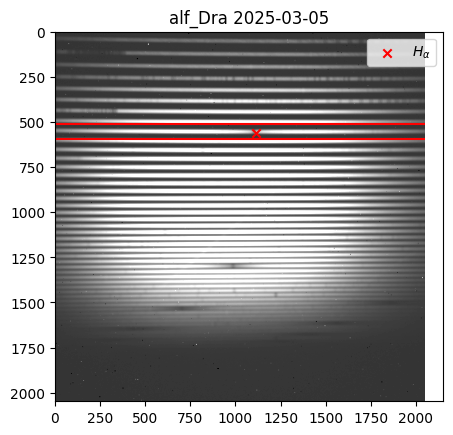

In [34]:
quickplot(alf_dra_image_correct, "alf_Dra 2025-03-05")
plt.scatter(1112,560, marker='x', color='red',label=r'$H_{\alpha}$')
plt.hlines(513,0,2048,'r')
plt.hlines(596,0 ,2048, 'r')
plt.legend()

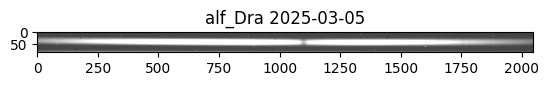

In [35]:
quickplot(alf_dra_image_correct[513:596,0:2048], "alf_Dra 2025-03-05")